In [10]:
import os
import pandas as pd
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Load Data from UCI Machine Learning Repository:

In [72]:
# only have to run once

try:
    # Create data Directory
    os.mkdir('data')
    print("data Directory Created ") 
except FileExistsError:
    print("data Directory already exists")


!wget -O data/processed.cleveland.data.csv http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data
!wget -O data/processed.hungarian.data.data.csv http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data
!wget -O data/processed.switzerland.data.csv http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data
!wget -O data/processed.va.data.csv http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data
!wget -O data/heart-disease.names.csv http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/heart-disease.names
                

data Directory Created 


--2020-01-12 19:10:40--  http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18461 (18K) [application/x-httpd-php]
Saving to: 'data/processed.cleveland.data.csv'

     0K .......... ........                                   100% 91.3K=0.2s

2020-01-12 19:10:41 (91.3 KB/s) - 'data/processed.cleveland.data.csv' saved [18461/18461]

--2020-01-12 19:10:41--  http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10263 (10K) [application/x-httpd-php]
Saving to: 'data/processed.hungarian

### Concatenate 4 datasets to one:

In [203]:
allFiles = glob.glob('data' + '/*.data.csv')

heart_disease_df = pd.DataFrame()
list_ = []

# column names as described in heart-disease.names.csv file
col_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, names=col_names)
    list_.append(df)
heart_disease_df = pd.concat(list_, sort=False, ignore_index=True)
heart_disease_df.tail()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
915,54.0,0.0,4.0,127,333,1,1,154,0,0,?,?,?,1
916,62.0,1.0,1.0,?,139,0,1,?,?,?,?,?,?,0
917,55.0,1.0,4.0,122,223,1,1,100,0,0,?,?,6,2
918,58.0,1.0,4.0,?,385,1,2,?,?,?,?,?,?,0
919,62.0,1.0,2.0,120,254,0,2,93,1,0,?,?,?,1


### Data Cleaning

In [204]:
# Replace '?' values with np.nan
heart_disease_df.replace(to_replace='?', value=-np.nan, inplace=True)
heart_disease_df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
915,54.0,0.0,4.0,127,333,1,1,154,0,0,NaN,NaN,NaN,1
916,62.0,1.0,1.0,NaN,139,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
917,55.0,1.0,4.0,122,223,1,1,100,0,0,NaN,NaN,6,2
918,58.0,1.0,4.0,NaN,385,1,2,NaN,NaN,NaN,NaN,NaN,NaN,0
919,62.0,1.0,2.0,120,254,0,2,93,1,0,NaN,NaN,NaN,1


In [205]:
# count percentage of NaN values in each dataset column
(1 - heart_disease_df.count() / len(heart_disease_df)) * 100

age          0.000000
sex          0.000000
cp           0.000000
trestbps     6.413043
chol         3.260870
fbs          9.782609
restecg      0.217391
thalach      5.978261
exang        5.978261
oldpeak      6.739130
slope       33.586957
ca          66.413043
thal        52.826087
num          0.000000
dtype: float64

In [206]:
# clear rows of columns that have NaN percentage < 10 %
cols_to_clear = ['trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak']
for col_name in cols_to_clear:
    heart_disease_df.drop(heart_disease_df[heart_disease_df[col_name].isnull()].index, inplace=True)
heart_disease_df.reset_index(drop=True, inplace=True)
heart_disease_df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
735,62.0,1.0,4.0,158,170,0,1,138,1,0,NaN,NaN,NaN,1
736,46.0,1.0,4.0,134,310,0,0,126,0,0,NaN,NaN,3,2
737,54.0,0.0,4.0,127,333,1,1,154,0,0,NaN,NaN,NaN,1
738,55.0,1.0,4.0,122,223,1,1,100,0,0,NaN,NaN,6,2
739,62.0,1.0,2.0,120,254,0,2,93,1,0,NaN,NaN,NaN,1


In [207]:
# percentage of deleted rows
print( (920-740)/920*100 )

19.565217391304348


In [208]:
# replace remaining NaN values with -1 (unknown)
heart_disease_df.replace(to_replace=np.nan, value=-1, inplace=True)
heart_disease_df.tail()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
735,62.0,1.0,4.0,158,170,0,1,138,1,0,-1,-1,-1,1
736,46.0,1.0,4.0,134,310,0,0,126,0,0,-1,-1,3,2
737,54.0,0.0,4.0,127,333,1,1,154,0,0,-1,-1,-1,1
738,55.0,1.0,4.0,122,223,1,1,100,0,0,-1,-1,6,2
739,62.0,1.0,2.0,120,254,0,2,93,1,0,-1,-1,-1,1


In [209]:
# convert all numbers to float
heart_disease_df = heart_disease_df.astype(float)
heart_disease_df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
735,62.0,1.0,4.0,158.0,170.0,0.0,1.0,138.0,1.0,0.0,-1.0,-1.0,-1.0,1.0
736,46.0,1.0,4.0,134.0,310.0,0.0,0.0,126.0,0.0,0.0,-1.0,-1.0,3.0,2.0
737,54.0,0.0,4.0,127.0,333.0,1.0,1.0,154.0,0.0,0.0,-1.0,-1.0,-1.0,1.0
738,55.0,1.0,4.0,122.0,223.0,1.0,1.0,100.0,0.0,0.0,-1.0,-1.0,6.0,2.0
739,62.0,1.0,2.0,120.0,254.0,0.0,2.0,93.0,1.0,0.0,-1.0,-1.0,-1.0,1.0


In [210]:
# group data into 2 categories of ‘no heart disease’ (value of 0) and ‘displaying heart disease’ (value of 1)
heart_disease_df.loc[heart_disease_df['num'] == 2, 'num'] = 1
heart_disease_df.loc[heart_disease_df['num'] == 3, 'num'] = 1
heart_disease_df.loc[heart_disease_df['num'] == 4, 'num'] = 1
heart_disease_df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
735,62.0,1.0,4.0,158.0,170.0,0.0,1.0,138.0,1.0,0.0,-1.0,-1.0,-1.0,1.0
736,46.0,1.0,4.0,134.0,310.0,0.0,0.0,126.0,0.0,0.0,-1.0,-1.0,3.0,1.0
737,54.0,0.0,4.0,127.0,333.0,1.0,1.0,154.0,0.0,0.0,-1.0,-1.0,-1.0,1.0
738,55.0,1.0,4.0,122.0,223.0,1.0,1.0,100.0,0.0,0.0,-1.0,-1.0,6.0,1.0
739,62.0,1.0,2.0,120.0,254.0,0.0,2.0,93.0,1.0,0.0,-1.0,-1.0,-1.0,1.0


In [211]:
# calculate class balance
heart_disease_df['num'].value_counts(normalize=True) * 100

1.0    51.756757
0.0    48.243243
Name: num, dtype: float64

### Visualize dataset

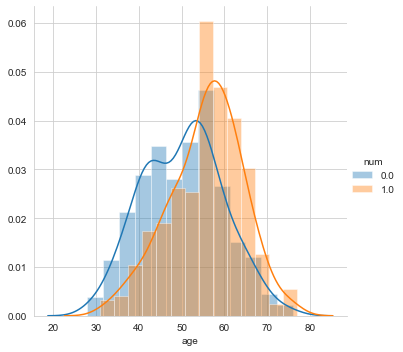

In [212]:
sns.FacetGrid(heart_disease_df, hue='num', size=5).map(sns.distplot, 'age').add_legend()

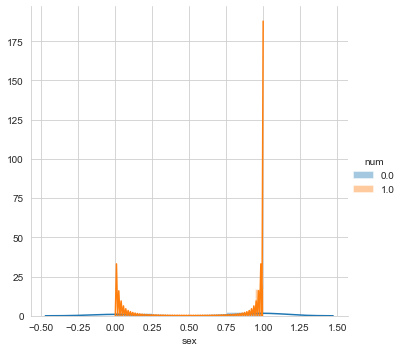

In [214]:
sns.FacetGrid(heart_disease_df, hue='num', size=5).map(sns.distplot, 'sex').add_legend()

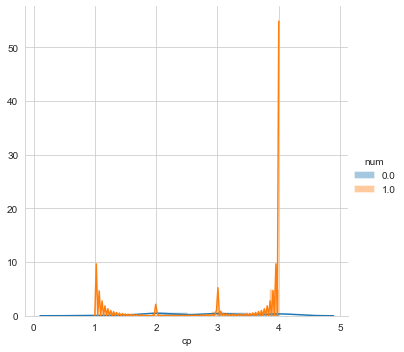

In [215]:
sns.FacetGrid(heart_disease_df, hue='num', size=5).map(sns.distplot, 'cp').add_legend()

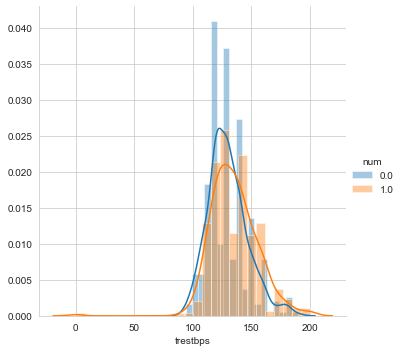

In [216]:
sns.FacetGrid(heart_disease_df, hue='num', size=5).map(sns.distplot, 'trestbps').add_legend()

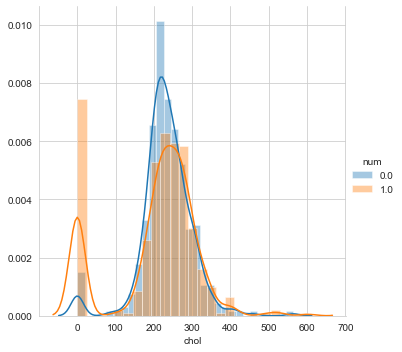

In [217]:
sns.FacetGrid(heart_disease_df, hue='num', size=5).map(sns.distplot, 'chol').add_legend()

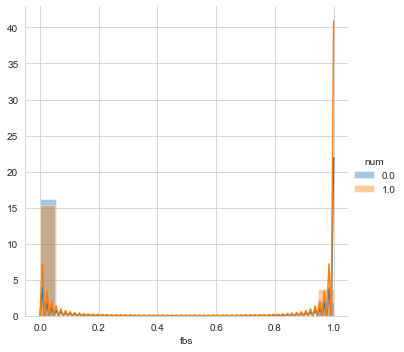

In [218]:
sns.FacetGrid(heart_disease_df, hue='num', size=5).map(sns.distplot, 'fbs').add_legend()

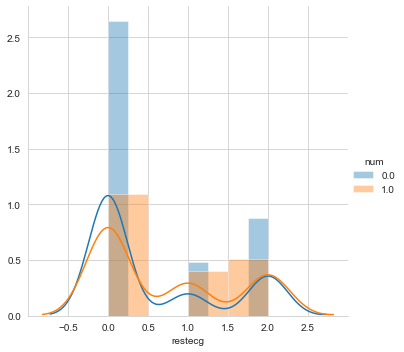

In [219]:
sns.FacetGrid(heart_disease_df, hue='num', size=5).map(sns.distplot, 'restecg').add_legend()

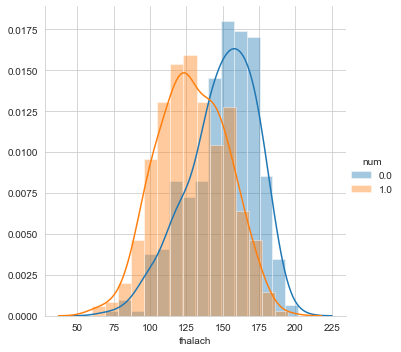

In [220]:
sns.FacetGrid(heart_disease_df, hue='num', size=5).map(sns.distplot, 'thalach').add_legend()

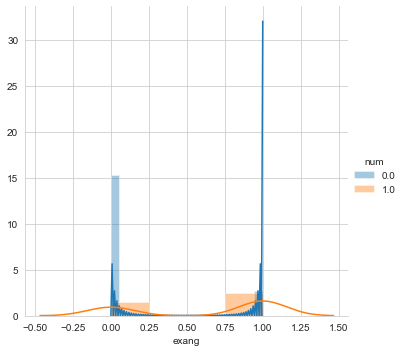

In [221]:
sns.FacetGrid(heart_disease_df, hue='num', size=5).map(sns.distplot, 'exang').add_legend()

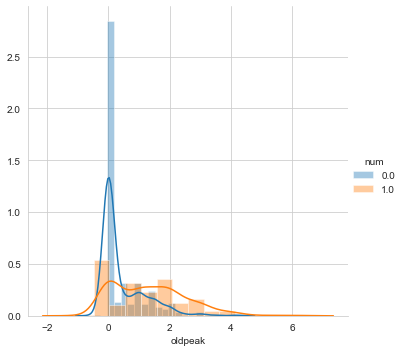

In [222]:
sns.FacetGrid(heart_disease_df, hue='num', size=5).map(sns.distplot, 'oldpeak').add_legend()

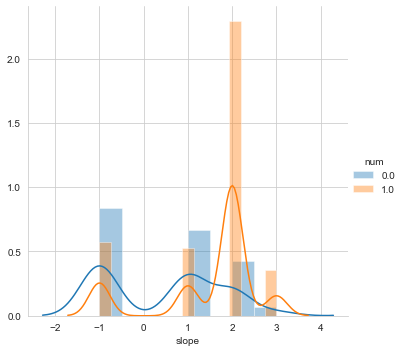

In [223]:
sns.FacetGrid(heart_disease_df, hue='num', size=5).map(sns.distplot, 'slope').add_legend()

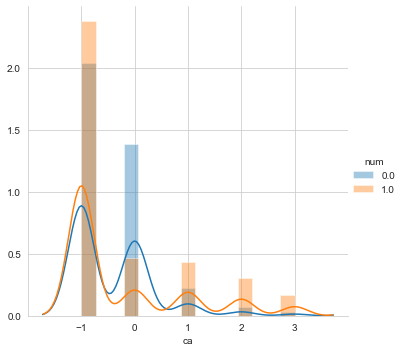

In [224]:
sns.FacetGrid(heart_disease_df, hue='num', size=5).map(sns.distplot, 'ca').add_legend()

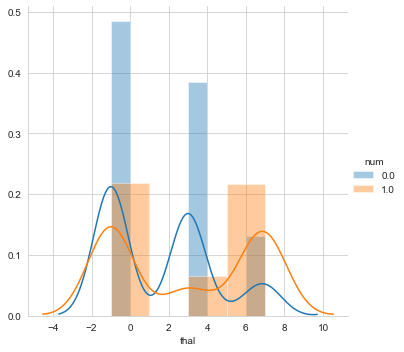

In [225]:
sns.FacetGrid(heart_disease_df, hue='num', size=5).map(sns.distplot, 'thal').add_legend()

### Feature correlation

In [234]:
heart_disease_df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,0.032852,0.197042,0.251817,-0.068419,0.223890,0.211845,-0.367020,0.234188,0.251741,0.317618,0.231228,0.200804,0.286994
sex,0.032852,1.000000,0.151092,0.012906,-0.179650,0.072285,-0.024622,-0.168457,0.186028,0.110612,0.031232,-0.099103,0.053109,0.300080
cp,0.197042,0.151092,1.000000,0.033367,-0.079015,0.023387,0.053679,-0.361233,0.440264,0.250019,0.265274,0.043480,0.133104,0.464048
trestbps,0.251817,0.012906,0.033367,1.000000,0.060759,0.160054,0.079375,-0.121594,0.180908,0.182027,0.089852,-0.002950,0.003449,0.149894
chol,-0.068419,-0.179650,-0.079015,0.060759,1.000000,0.034016,0.085242,0.196281,-0.065146,0.060660,-0.073961,0.211433,-0.110880,-0.136222
fbs,0.223890,0.072285,0.023387,0.160054,0.034016,1.000000,0.105944,-0.056214,0.043261,0.053402,0.072619,0.046345,0.049031,0.125346
restecg,0.211845,-0.024622,0.053679,0.079375,0.085242,0.105944,1.000000,0.048554,0.039431,0.111673,0.186317,0.341628,0.245820,0.089375
thalach,-0.367020,-0.168457,-0.361233,-0.121594,0.196281,-0.056214,0.048554,1.000000,-0.390388,-0.181867,-0.138919,0.188064,0.051760,-0.394231
exang,0.234188,0.186028,0.440264,0.180908,-0.065146,0.043261,0.039431,-0.390388,1.000000,0.409744,0.403745,-0.042497,0.095300,0.490201
oldpeak,0.251741,0.110612,0.250019,0.182027,0.060660,0.053402,0.111673,-0.181867,0.409744,1.000000,0.601066,0.216027,0.127533,0.416882


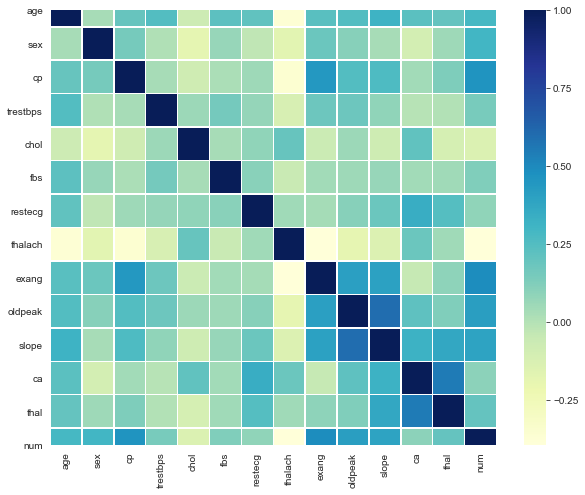

In [256]:
corrMatrix = heart_disease_df.corr()

fig, ax = plt.subplots(figsize=(10,8))

sns.heatmap(corrMatrix, cmap="YlGnBu", linewidths=.5)


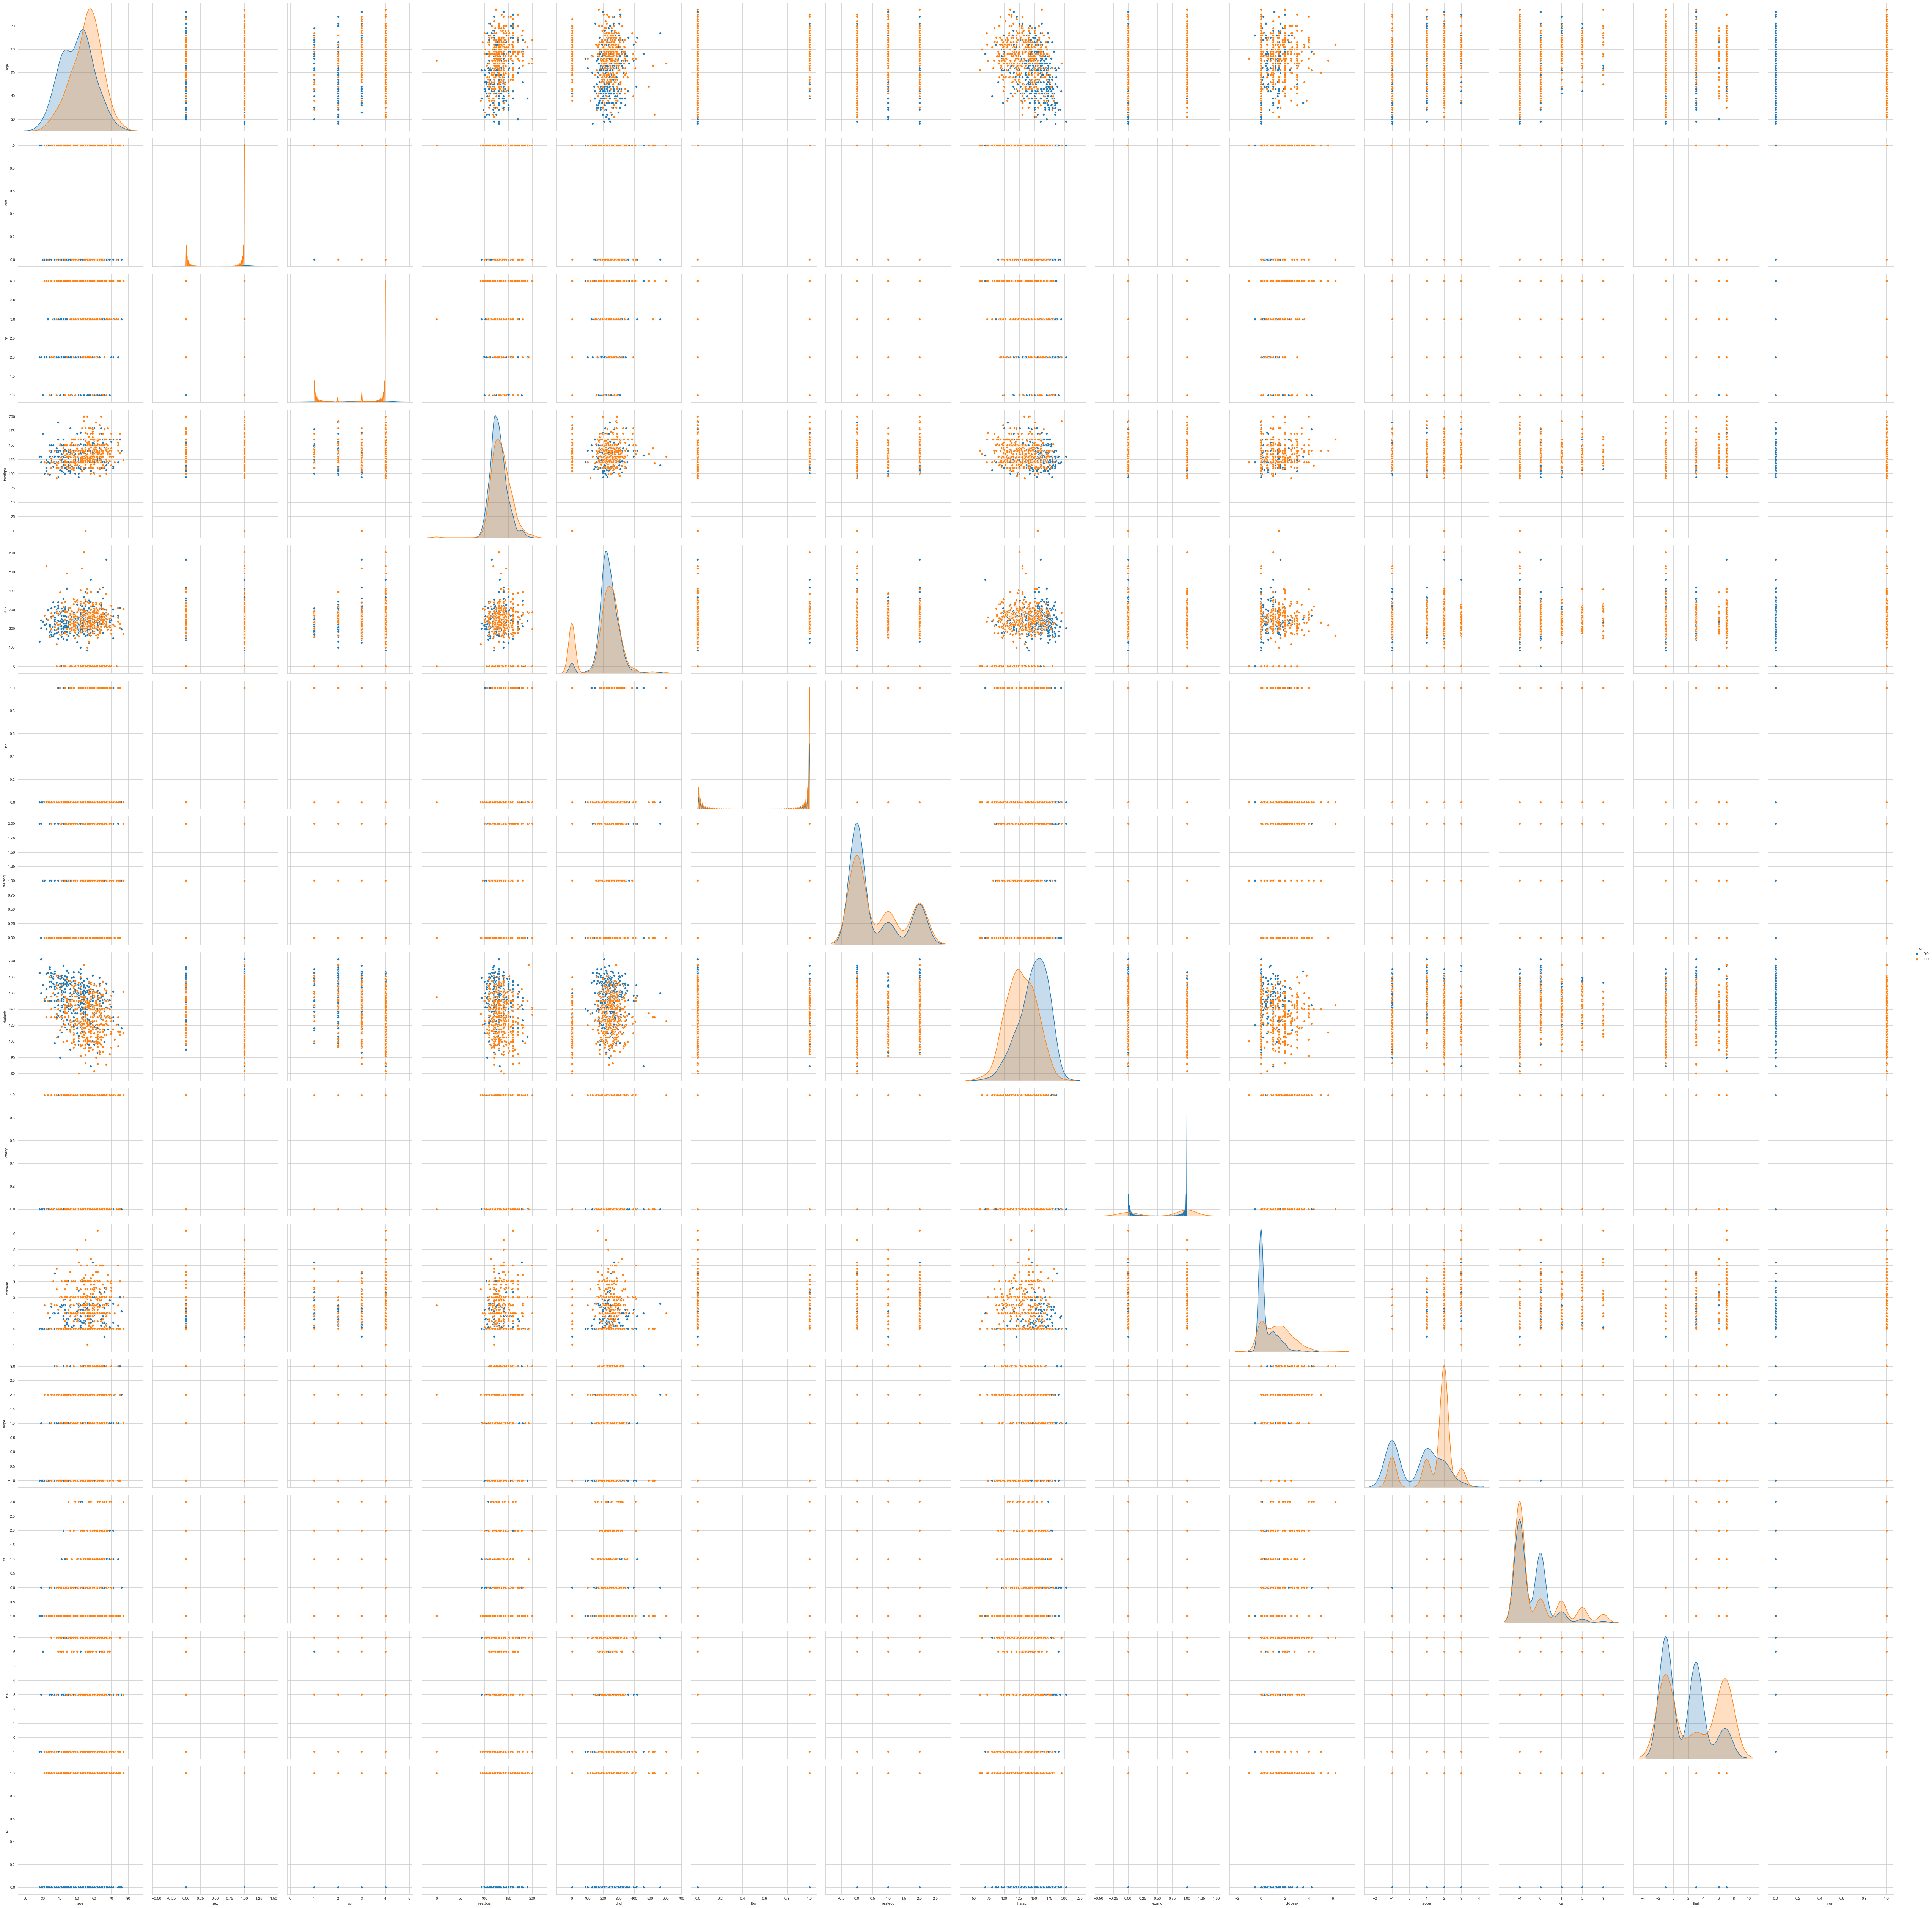

In [230]:
sns.set_style("whitegrid")
sns.pairplot(heart_disease_df, hue="num", size=5);
plt.show()